# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
pip install pandas requests


SyntaxError: invalid syntax (4208872357.py, line 6)

In [2]:
import pandas as pd
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as bs
import requests

In [3]:
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
page = Request(url=url_tesla,headers={'User-Agent':'Mozilla/'})
html_str = urlopen(page).read()

text = bs(html_str)
text



<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [4]:
soup = bs(html_str,"html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [5]:
table = text.find_all("table")[1]
table_body = table.find('tbody')

#table
table_body

<tbody>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329</td>
</tr>
<tr>
<td style="text-align:center">2022-12-31</td>
<td style="text-align:center">$24,318</td>
</tr>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td

In [6]:
data=[]
rows = table_body.find_all('tr')
#print(rows)
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
    #print(cols)
data
#print(data)

[['2023-09-30', '$23,350'],
 ['2023-06-30', '$24,927'],
 ['2023-03-31', '$23,329'],
 ['2022-12-31', '$24,318'],
 ['2022-09-30', '$21,454'],
 ['2022-06-30', '$16,934'],
 ['2022-03-31', '$18,756'],
 ['2021-12-31', '$17,719'],
 ['2021-09-30', '$13,757'],
 ['2021-06-30', '$11,958'],
 ['2021-03-31', '$10,389'],
 ['2020-12-31', '$10,744'],
 ['2020-09-30', '$8,771'],
 ['2020-06-30', '$6,036'],
 ['2020-03-31', '$5,985'],
 ['2019-12-31', '$7,384'],
 ['2019-09-30', '$6,303'],
 ['2019-06-30', '$6,350'],
 ['2019-03-31', '$4,541'],
 ['2018-12-31', '$7,226'],
 ['2018-09-30', '$6,824'],
 ['2018-06-30', '$4,002'],
 ['2018-03-31', '$3,409'],
 ['2017-12-31', '$3,288'],
 ['2017-09-30', '$2,985'],
 ['2017-06-30', '$2,790'],
 ['2017-03-31', '$2,696'],
 ['2016-12-31', '$2,285'],
 ['2016-09-30', '$2,298'],
 ['2016-06-30', '$1,270'],
 ['2016-03-31', '$1,147'],
 ['2015-12-31', '$1,214'],
 ['2015-09-30', '$937'],
 ['2015-06-30', '$955'],
 ['2015-03-31', '$940'],
 ['2014-12-31', '$957'],
 ['2014-09-30', '$852'],

In [7]:
df = pd.DataFrame(data, columns=['date','price'])
#print(df)
df = df.dropna()
df

,date,price
0,2023-09-30,"$23,350"
1,2023-06-30,"$24,927"
2,2023-03-31,"$23,329"
3,2022-12-31,"$24,318"
4,2022-09-30,"$21,454"
5,2022-06-30,"$16,934"
6,2022-03-31,"$18,756"
7,2021-12-31,"$17,719"
8,2021-09-30,"$13,757"
9,2021-06-30,"$11,958"


In [8]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '.')
df['price'] = df['price'].astype(float)
df

/tmp/ipykernel_5407/3971312340.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


,date,price
0,2023-09-30,23.350
1,2023-06-30,24.927
2,2023-03-31,23.329
3,2022-12-31,24.318
4,2022-09-30,21.454
5,2022-06-30,16.934
6,2022-03-31,18.756
7,2021-12-31,17.719
8,2021-09-30,13.757
9,2021-06-30,11.958


In [9]:
import sqlite3

In [10]:
con = sqlite3.connect("tesla.db")
df.to_sql('quarterly', con, if_exists='replace')

57

In [11]:
cursor = con.execute("SELECT * from quarterly WHERE date like '2010%'")
for i in cursor:
    print(i)

(51, '2010-12-31', 36.0)
(52, '2010-09-30', 31.0)
(53, '2010-06-30', 28.0)
(54, '2010-03-31', 21.0)


In [12]:
con.commit()

In [13]:
con.close()

In [14]:
years=[]
means=[]
for i in range(2009,2024):
    df_per_year=df.loc[df['date'].str.contains(str(i))]
    years.append(i)
    means.append(df_per_year['price'].mean())

In [15]:
dataframe_mean_per_year = pd.DataFrame({
    "Years": years,
    "Mean": means
})

In [16]:
dataframe_mean_per_year

,Years,Mean
0,2009,36.500000
1,2010,29.000000
2,2011,51.000000
3,2012,103.250000
4,2013,503.250000
5,2014,799.750000
6,2015,708.303500
7,2016,1.750000
8,2017,2.939750
9,2018,5.365250


In [17]:
import matplotlib.pyplot as plt

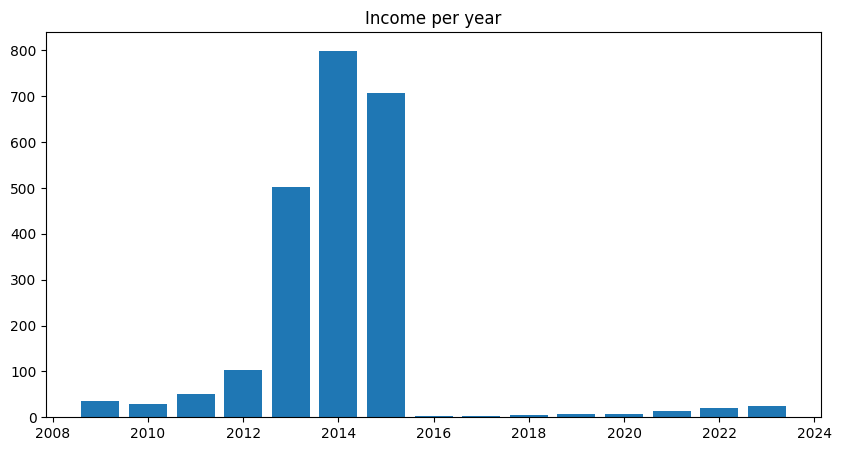

In [18]:
labels = dataframe_mean_per_year['Years']
values = dataframe_mean_per_year['Mean']

plt.figure(figsize = (10, 5))

plt.bar(labels, values)

plt.title("Income per year")
plt.show()

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

ModuleNotFoundError: No module named 'statsmodels'